# Subset GOES ABI NetCDF files to lon/lat bounds

In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt

import goes_ortho

**Define the lat/lon bounds we want**

`bounds = (minimum latitude, maximum latitude, minimum longitude, maximum longitude)`

In [2]:
bounds = (30, 50, -125, -105)

**Specify the file we want to crop to these bounds**

And provide a new filename for saving the new cropped image.

In [3]:
filepath = '/storage/GOES/goes17/2020/3/3/ABI-L1b-RadC/00/C03/OR_ABI-L1b-RadC-M6C03_G17_s20200630001176_e20200630003549_c20200630004001.nc'
new_filepath = '/storage/GOES/goes17/2020/3/3/ABI-L1b-RadC/00/C03/OR_ABI-L1b-RadC-M6C03_G17_s20200630001176_e20200630003549_c20200630004001_clipped.nc'

Subset GOES ABI image to these bounds and save to new file

In [4]:
goes_ortho.subset_abi_netcdf(filepath, bounds, new_filepath)

Subsetting 
/storage/GOES/goes17/2020/3/3/ABI-L1b-RadC/00/C03/OR_ABI-L1b-RadC-M6C03_G17_s20200630001176_e20200630003549_c20200630004001.nc
 to these bounds:
	(-125,50).	.(-105,50)



	(-125,30).	.(-105,30)



**Load the original and the subset image and overlay the two**

In [5]:
original = xr.open_dataset(filepath)
new = xr.open_dataset(new_filepath)

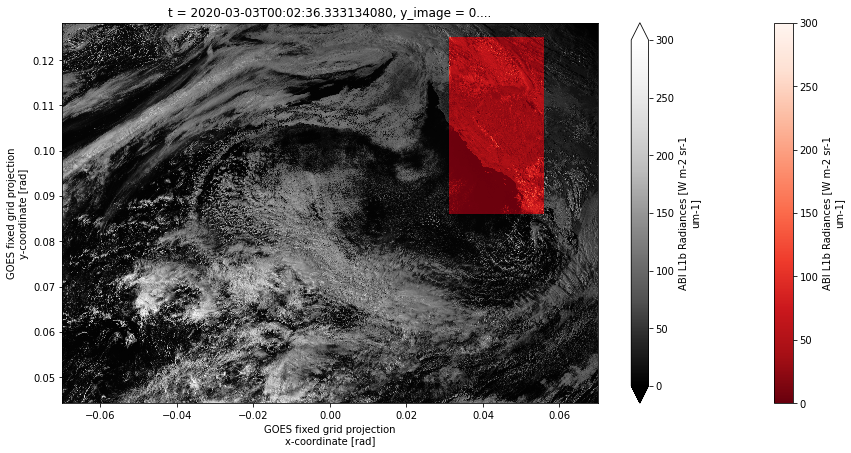

In [6]:
fig, ax = plt.subplots(1,1, figsize=(15,7))

new.Rad.plot.imshow(ax=ax, cmap='Reds_r', vmin=0, vmax=300, zorder=1)
original.Rad.plot.imshow(ax=ax, cmap='Greys_r', vmin=0, vmax=300, zorder=0)